Methods used-

1. Mean for missing data.
2. Discretization with decision trees for continuous variables.
3. Weight of evidence method for categorical encoding.
4. Standard scaler for feature scaling.

Conclusion-

1. SVM overall predicts very well with the upscaling but comparatively large number of false positives.
2. The Discretization with decision trees and WOE method for categorical encoding creates a monotonic relationship between features and target column.
3. Large number of false positives.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Disease Prediction Data.csv')
dataset=dataset.drop('id',axis=1)

In [3]:
print(dataset.shape)
dataset.head()

(5110, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,apoplexy
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes


In [4]:
dataset['apoplexy'].value_counts()

No     4861
Yes     249
Name: apoplexy, dtype: int64

In [5]:
dataset.isnull().mean()

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
apoplexy             0.000000
dtype: float64

In [6]:
vars_with_na=[var for var in dataset.columns if dataset[var].isnull().mean()>0]
vars_with_na

['bmi']

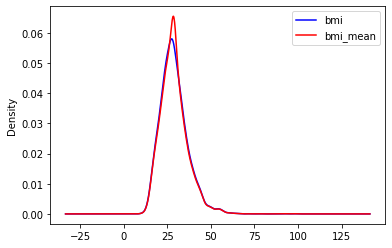

In [7]:
bmi_check=pd.DataFrame()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

bmi_check['bmi']=dataset['bmi']
bmi_check['bmi_mean']=imputer.fit_transform(dataset[['bmi']])

fig_median=plt.figure()
ax1=fig_median.add_subplot(111)

bmi_check['bmi'].plot(kind='kde', ax=ax1, color='blue')
bmi_check['bmi_mean'].plot(kind='kde', ax=ax1, color='red')


lines1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(lines1, labels1, loc='best')

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
dataset['bmi']=imputer.fit_transform(dataset[['bmi']])

In [9]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,apoplexy
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.600000,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.893237,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.400000,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Yes


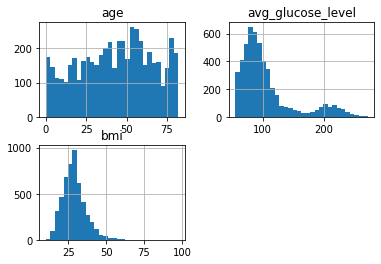

In [10]:
dataset[['age','avg_glucose_level','bmi']].hist(bins=30)
plt.show()

In [11]:
def impute_na(data, variable):
    df=data.copy()
    
    df[variable+'_random']=df[variable]
    random_sample = dataset[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random']=random_sample
    return df[variable+'_random']
    

In [12]:
dataset['age']=impute_na(dataset, 'age')
dataset['avg_glucose_level']=impute_na(dataset, 'avg_glucose_level')
dataset['bmi']=impute_na(dataset, 'bmi')


In [13]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth = 4)
tree_model.fit(x['age'].to_frame(), y)
x['age']=tree_model.predict_proba(x['age'].to_frame())


In [15]:
tree_model1 = DecisionTreeClassifier(max_depth = 4)
tree_model1.fit(x['avg_glucose_level'].to_frame(), y)
x['avg_glucose_level']=tree_model1.predict_proba(x['avg_glucose_level'].to_frame())

In [16]:
tree_model2 = DecisionTreeClassifier(max_depth = 4)
tree_model2.fit(x['bmi'].to_frame(), y)
x['bmi']=tree_model2.predict_proba(x['bmi'].to_frame())

In [17]:
dataset=pd.concat([x,y],axis=1)

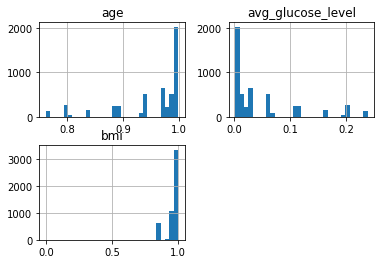

In [18]:
dataset[['age','avg_glucose_level','bmi']].hist(bins=30)
plt.show()

In [19]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,apoplexy
0,Male,0.938462,No,Yes,Yes,Private,Urban,0.061538,0.866044,formerly smoked,Yes
1,Female,0.938462,No,No,Yes,Self-employed,Rural,0.061538,0.866044,never smoked,Yes
2,Male,0.761538,No,Yes,Yes,Private,Rural,0.238462,0.966667,never smoked,Yes
3,Female,0.967280,No,No,Yes,Private,Urban,0.032720,0.866044,smokes,Yes
4,Female,0.799283,Yes,No,Yes,Self-employed,Rural,0.200717,0.866044,never smoked,Yes


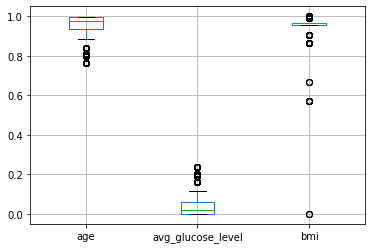

In [20]:
dataset[['age','avg_glucose_level','bmi']].boxplot()
plt.show()

In [21]:
dataset[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']].nunique()

gender            3
hypertension      2
heart_disease     2
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64

In [22]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [23]:
print(pd.DataFrame(y))

        0
0     Yes
1     Yes
2     Yes
3     Yes
4     Yes
...   ...
5105   No
5106   No
5107   No
5108   No
5109   No

[5110 rows x 1 columns]


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [25]:
print(pd.DataFrame(y))

      0
0     1
1     1
2     1
3     1
4     1
...  ..
5105  0
5106  0
5107  0
5108  0
5109  0

[5110 rows x 1 columns]


In [26]:
print(pd.DataFrame(x))

           0         1    2    3    4              5      6         7  \
0       Male  0.938462   No  Yes  Yes        Private  Urban  0.061538   
1     Female  0.938462   No   No  Yes  Self-employed  Rural  0.061538   
2       Male  0.761538   No  Yes  Yes        Private  Rural  0.238462   
3     Female   0.96728   No   No  Yes        Private  Urban   0.03272   
4     Female  0.799283  Yes   No  Yes  Self-employed  Rural  0.200717   
...      ...       ...  ...  ...  ...            ...    ...       ...   
5105  Female  0.761538  Yes   No  Yes        Private  Urban  0.238462   
5106  Female  0.761538   No   No  Yes  Self-employed  Urban  0.238462   
5107  Female   0.99852   No   No  Yes  Self-employed  Rural   0.00148   
5108    Male   0.96728   No   No  Yes        Private  Rural   0.03272   
5109  Female  0.986166   No   No  Yes       Govt_job  Urban  0.013834   

             8                9  
0     0.866044  formerly smoked  
1     0.866044     never smoked  
2     0.966667     ne

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [28]:
from category_encoders.woe import WOEEncoder
woe_enc=WOEEncoder(cols=[0,2,3,4,5,6,9])
woe_enc.fit(x_train,y_train)

WOEEncoder(cols=[0, 2, 3, 4, 5, 6, 9])

In [29]:
x_train=woe_enc.transform(x_train)
x_test=woe_enc.transform(x_test)

In [30]:
print(pd.DataFrame(x_train))

             0         1         2         3         4         5         6  \
0    -0.051950   0.96875 -0.217472 -0.166197  0.276865  0.491803 -0.092139   
1    -0.051950   0.96875 -0.217472 -0.166197  0.276865  0.024991  0.082351   
2     0.035875   0.99852 -0.217472 -0.166197  0.276865  0.068653 -0.092139   
3    -0.051950  0.761538 -0.217472 -0.166197  0.276865  0.068653 -0.092139   
4     0.035875  0.938462 -0.217472 -0.166197  0.276865  0.068653  0.082351   
...        ...       ...       ...       ...       ...       ...       ...   
4083 -0.051950  0.977477 -0.217472 -0.166197  0.276865  0.068653  0.082351   
4084  0.035875  0.977477 -0.217472 -0.166197  0.276865  0.068653 -0.092139   
4085  0.035875   0.99852 -0.217472 -0.166197  0.276865  0.068653 -0.092139   
4086  0.035875  0.977477 -0.217472 -0.166197  0.276865  0.068653 -0.092139   
4087  0.035875  0.808511 -0.217472 -0.166197  0.276865  0.068653 -0.092139   

             7         8         9  
0      0.03125  0.955224  

In [31]:
print(pd.DataFrame(y_train))

      0
0     0
1     0
2     0
3     0
4     0
...  ..
4083  0
4084  0
4085  0
4086  0
4087  1

[4088 rows x 1 columns]


In [32]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [33]:
x_train,y_train=sm.fit_resample(x_train,y_train)

In [34]:
print(pd.DataFrame(y_train))

      0
0     0
1     0
2     0
3     0
4     0
...  ..
7793  1
7794  1
7795  1
7796  1
7797  1

[7798 rows x 1 columns]


In [35]:
print(pd.DataFrame(y_test))

      0
0     0
1     0
2     0
3     0
4     0
...  ..
1017  0
1018  0
1019  0
1020  0
1021  0

[1022 rows x 1 columns]


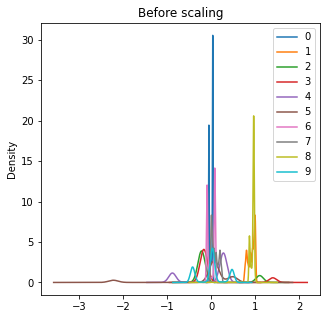

In [36]:
fig,ax5=plt.subplots(figsize=(5,5))
pd.DataFrame(x_train).plot(kind='kde', ax=ax5)
ax5.set_title('Before scaling')
lines5, labels5 = ax5.get_legend_handles_labels()
ax5.legend(lines5, labels5, loc='best')

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

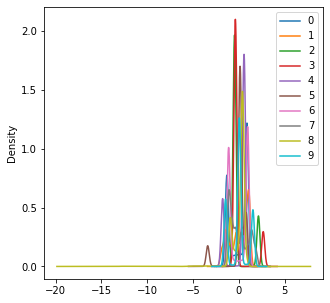

In [38]:
fig,ax6=plt.subplots(figsize=(5,5))
pd.DataFrame(x_train_scaled).plot(kind='kde', ax=ax6)
ax5.set_title('After scaling')
lines6, labels6 = ax6.get_legend_handles_labels()
ax6.legend(lines6, labels6, loc='best')

In [39]:
print(pd.DataFrame(x_train_scaled))

             0         1         2         3         4         5         6  \
0    -1.307959  0.744902 -0.467169 -0.375356  0.570792  0.802698 -1.114636   
1    -1.307959  0.744902 -0.467169 -0.375356  0.570792  0.079054  0.963545   
2     0.893980  1.124811 -0.467169 -0.375356  0.570792  0.146738 -1.114636   
3    -1.307959 -1.899431 -0.467169 -0.375356  0.570792  0.146738 -1.114636   
4     0.893980  0.358375 -0.467169 -0.375356  0.570792  0.146738  0.963545   
...        ...       ...       ...       ...       ...       ...       ...   
7793 -0.116349 -0.225716 -0.467169 -0.375356  0.570792  0.802698 -1.114636   
7794 -0.930253 -0.517198  2.140552 -0.375356  0.570792  0.802698 -0.758159   
7795 -1.183114 -0.227911 -0.467169 -0.375356 -1.765886  0.146738 -0.996808   
7796 -1.307959 -0.941353 -0.467169  2.664134  0.570792  0.146738  0.963545   
7797  0.893980 -0.330739 -0.467169 -0.375356  0.570792  0.802698  0.075685   

             7         8         9  
0    -0.744902  0.285887  

In [40]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',C= 0.1, gamma=5,random_state=0)
classifier.fit(x_train_scaled,y_train)

SVC(C=0.1, gamma=5, random_state=0)

In [41]:
y_pred=classifier.predict(x_test_scaled)
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[606 356]
 [  7  53]]


0.6448140900195695

In [42]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


In [43]:
print(pd.DataFrame(y_pred).apply(pd.value_counts))

     0
0  613
1  409


In [44]:
print(pd.DataFrame(y_test).apply(pd.value_counts))

     0
0  962
1   60


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,f1_score,recall_score,roc_auc_score,classification_report
accuracies = cross_val_score(estimator = classifier,X=x_train_scaled,y=y_train,cv=10)
Precision = precision_score(y_true=y_test,y_pred=y_pred)
f1_score = f1_score(y_true=y_test,y_pred=y_pred)
recall_score = recall_score(y_true=y_test,y_pred=y_pred)
roc_auc_score = roc_auc_score(y_true=y_test,y_score=y_pred)

print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))
print("Precision: {:.2f}%".format(Precision.mean()*100))
print("f1_score: {:.2f}".format(f1_score))
print("recall_score: {:.2f}".format(recall_score))
print("roc_auc_score: {:.2f}%".format(roc_auc_score.mean()*100))
print(classification_report(y_true=y_test,y_pred=y_pred))

Accuracy: 79.53%
Standard Deviation: 1.33%
Precision: 12.96%
f1_score: 0.23
recall_score: 0.88
roc_auc_score: 75.66%
              precision    recall  f1-score   support

           0       0.99      0.63      0.77       962
           1       0.13      0.88      0.23        60

    accuracy                           0.64      1022
   macro avg       0.56      0.76      0.50      1022
weighted avg       0.94      0.64      0.74      1022



In [54]:
from sklearn.model_selection import GridSearchCV
parameters=[{'kernel':['rbf','poly','sigmoid'],'gamma':[5.0,6.0,7.0,8.0,9.0,10.0],'C':[2,2.5,3,3.5,4,4.5,5]},
           {'kernel':['linear'],'gamma':[0.5,0.6,0.7,0.8,0.9,1.0],'C':[1,1.25,1.5,1.75,2]}]
grid_search=GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
grid_search.fit(x_train_scaled,y_train)
best_accuracy=grid_search.best_score_
best_parameters=grid_search.best_params_
print("Best Accuracy: {:.2f}%".format(best_accuracy*100))
print("Best Accuracy: ",best_parameters)

Best Accuracy: 82.70%
Best Accuracy:  {'C': 5, 'gamma': 10.0, 'kernel': 'poly'}


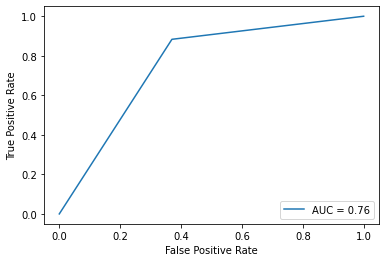

In [46]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred, pos_label=1)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
display.plot()
plt.show()